In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import json
# linear regression two ways 
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression 
import statsmodels.formula.api as smf

# model selection 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectFromModel 
from sklearn.linear_model import LassoCV
import warnings
warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (15, 10)

In [2]:
df = pd.read_csv('US_youtube_trending_data.csv')
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123786,0w-z8TBUTck,WE KEPT THIS SECRET FOR A YEAR AND A HALF...,2022-04-12T01:49:30Z,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2022-04-18T00:00:00Z,[None],948489,56987,0,4771,https://i.ytimg.com/vi/0w-z8TBUTck/default.jpg,False,False,You guys know I love the Green Tea Detox Mask ...
123787,7fOY40FvF9Q,Ichiraku Ramen from Naruto | Anime with Alvin,2022-04-12T13:00:04Z,UCJHA_jMfCvEnv-3kRjTCQXw,Babish Culinary Universe,22,2022-04-18T00:00:00Z,babish|babbish|basics with babish|binging with...,967056,48737,0,1540,https://i.ytimg.com/vi/7fOY40FvF9Q/default.jpg,False,False,This episode is sponsored by Squarespace. Head...
123788,wqn3gR1WTcA,Data Brokers: Last Week Tonight with John Oliv...,2022-04-11T06:30:09Z,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,24,2022-04-18T00:00:00Z,[None],4180297,150136,0,9091,https://i.ytimg.com/vi/wqn3gR1WTcA/default.jpg,False,False,John Oliver discusses how much data brokers kn...
123789,9QZy8dV7q1s,Trevor Reacts to Will Smith’s Oscars Ban & Was...,2022-04-12T02:54:42Z,UCwWhs_6x42TyRM4Wstoq8HA,The Daily Show with Trevor Noah,23,2022-04-18T00:00:00Z,the daily show|trevor noah|daily show with tre...,2895015,56837,0,3534,https://i.ytimg.com/vi/9QZy8dV7q1s/default.jpg,False,False,"COVID-19 cases surge among Washington, D.C.’s ..."


In [3]:
with open("US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['categoryId'].map(cat_dict)

In [4]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'],infer_datetime_format=True)
df['trending_date'] = pd.to_datetime(df['trending_date'],infer_datetime_format=True)

In [5]:
df['publish_hour']= df['publishedAt'].dt.hour
df['publish_weekday'] = df['publishedAt'].dt.day_name()

In [6]:
df['trend_time'] = (df['trending_date']-df['publishedAt']).dt.days

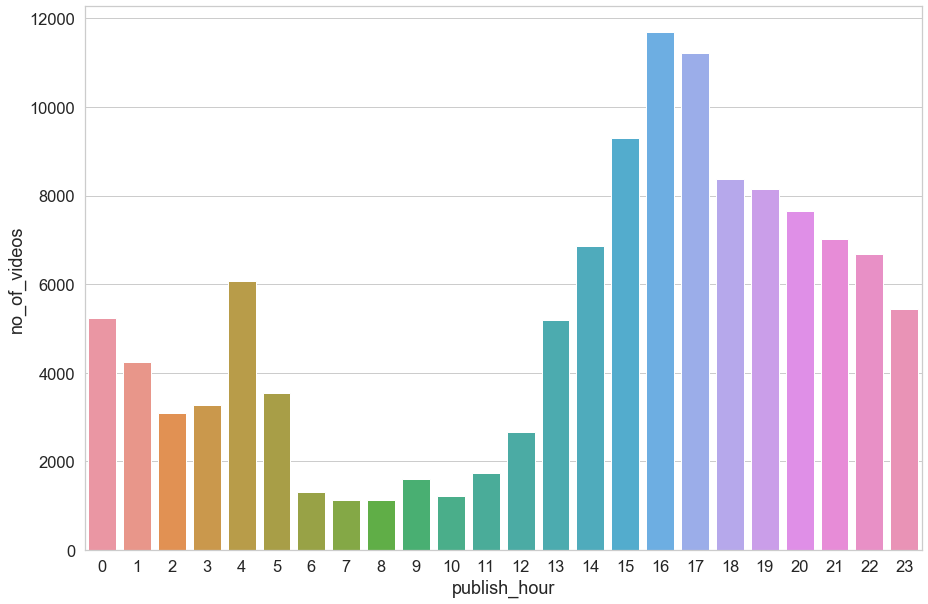

In [7]:
c = df['publish_hour'].value_counts()
h=pd.DataFrame({"publish_hour":c.index,"no_of_videos":c})
h=h.sort_values("publish_hour")
sns.barplot(x="publish_hour",y="no_of_videos",data=h)

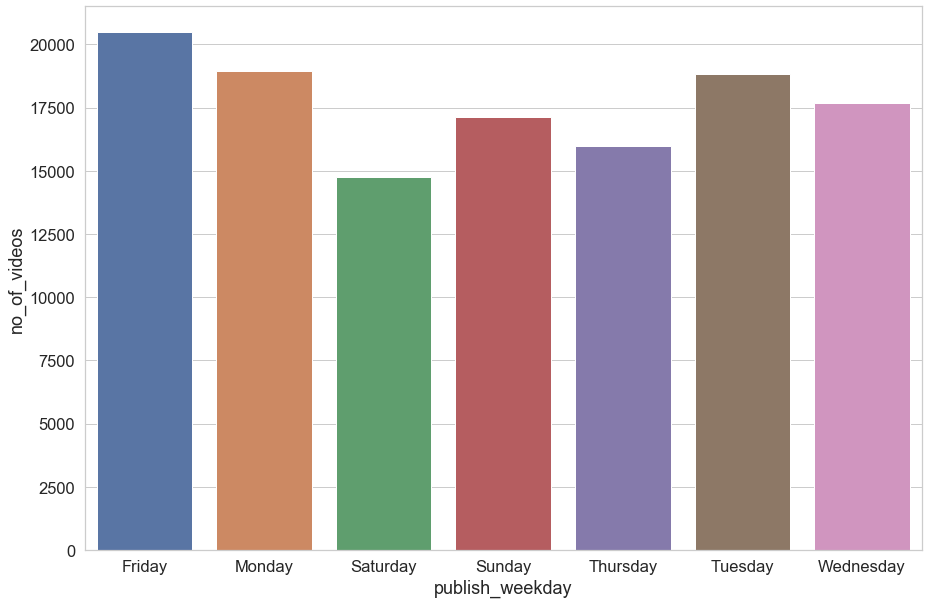

In [8]:
c = df['publish_weekday'].value_counts()
h=pd.DataFrame({'publish_weekday':c.index,"no_of_videos":c})
h=h.sort_values('publish_weekday')
sns.barplot(x='publish_weekday',y="no_of_videos",data=h)

In [9]:
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category_name,publish_hour,publish_weekday,trend_time
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,19,Tuesday,0
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Gaming,17,Tuesday,0
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Entertainment,16,Tuesday,0
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music,16,Tuesday,0
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,Howto & Style,15,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123786,0w-z8TBUTck,WE KEPT THIS SECRET FOR A YEAR AND A HALF...,2022-04-12 01:49:30,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2022-04-18,[None],948489,56987,0,4771,https://i.ytimg.com/vi/0w-z8TBUTck/default.jpg,False,False,You guys know I love the Green Tea Detox Mask ...,Howto & Style,1,Tuesday,5
123787,7fOY40FvF9Q,Ichiraku Ramen from Naruto | Anime with Alvin,2022-04-12 13:00:04,UCJHA_jMfCvEnv-3kRjTCQXw,Babish Culinary Universe,22,2022-04-18,babish|babbish|basics with babish|binging with...,967056,48737,0,1540,https://i.ytimg.com/vi/7fOY40FvF9Q/default.jpg,False,False,This episode is sponsored by Squarespace. Head...,People & Blogs,13,Tuesday,5
123788,wqn3gR1WTcA,Data Brokers: Last Week Tonight with John Oliv...,2022-04-11 06:30:09,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,24,2022-04-18,[None],4180297,150136,0,9091,https://i.ytimg.com/vi/wqn3gR1WTcA/default.jpg,False,False,John Oliver discusses how much data brokers kn...,Entertainment,6,Monday,6
123789,9QZy8dV7q1s,Trevor Reacts to Will Smith’s Oscars Ban & Was...,2022-04-12 02:54:42,UCwWhs_6x42TyRM4Wstoq8HA,The Daily Show with Trevor Noah,23,2022-04-18,the daily show|trevor noah|daily show with tre...,2895015,56837,0,3534,https://i.ytimg.com/vi/9QZy8dV7q1s/default.jpg,False,False,"COVID-19 cases surge among Washington, D.C.’s ...",Comedy,2,Tuesday,5


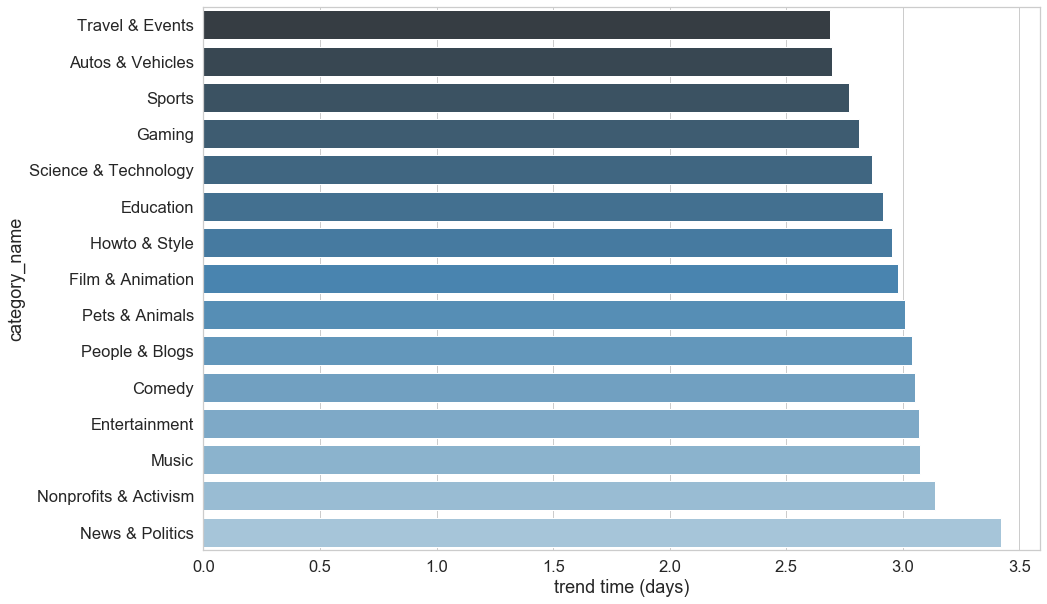

In [10]:
trend_by_cat = df.groupby('category_name').mean()['trend_time'].sort_values(ascending = True)
trend_by_cat = pd.DataFrame({'category_name': trend_by_cat.index, 'trend time (days)': trend_by_cat.values})
sns.barplot(y = 'category_name', x = 'trend time (days)', data = trend_by_cat,palette="Blues_d")

In [11]:
top_channel = pd.DataFrame({'channel title':df.channelTitle.value_counts()[:10].index,'number of videos':df.channelTitle.value_counts()[:10]})

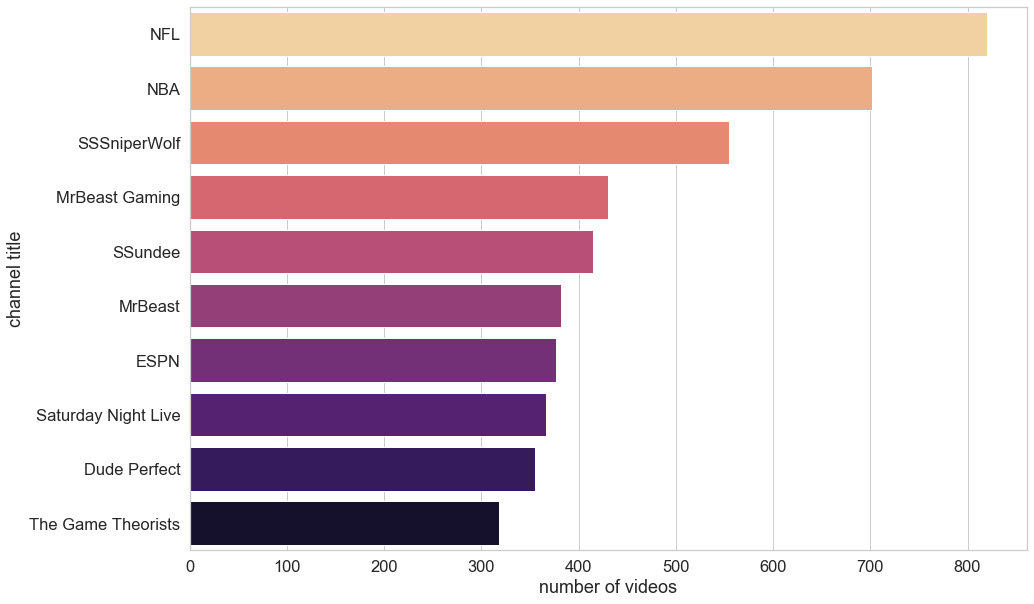

In [12]:
sns.barplot(y="channel title",x="number of videos",data = top_channel, palette = "magma_r")

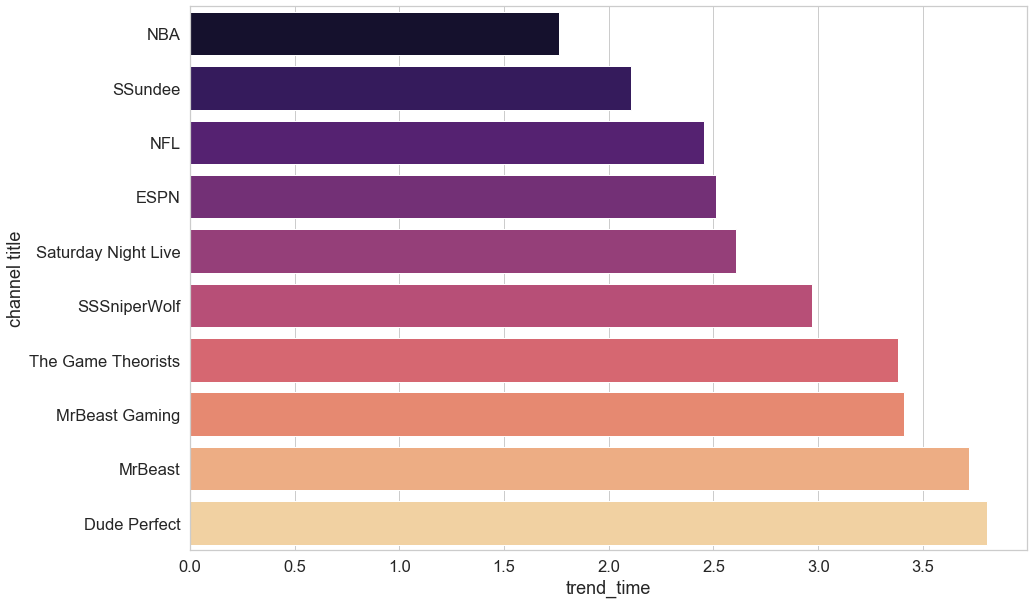

In [13]:
trend_by_chan = df[df.channelTitle.isin(top_channel['channel title'])].groupby('channelTitle').mean()['trend_time'].sort_values()
trend_by_chan = pd.DataFrame({'channel title': trend_by_chan.index, 'trend_time': trend_by_chan.values})
sns.barplot(y = 'channel title', x = 'trend_time', data = trend_by_chan,palette = "magma")

## Model Building

In [14]:
ML_df= df.groupby(['video_id','trending_date','publishedAt'],as_index=False).agg({'view_count':'max','likes':'max','dislikes':'max','comment_count':'max'})

In [15]:
ML_df[ML_df.video_id == '--14w5SOEUs']

,video_id,trending_date,publishedAt,view_count,likes,dislikes,comment_count
0,--14w5SOEUs,2021-06-11,2021-06-10 16:00:00,2146104,167034,1755,12998
1,--14w5SOEUs,2021-06-12,2021-06-10 16:00:00,3963014,218568,2847,15442
2,--14w5SOEUs,2021-06-13,2021-06-10 16:00:00,5167987,240113,3414,16241
3,--14w5SOEUs,2021-06-14,2021-06-10 16:00:00,6078723,252005,3778,16228
4,--14w5SOEUs,2021-06-15,2021-06-10 16:00:00,6823249,262692,4107,16445


In [16]:
df1 = ML_df.copy()

In [17]:
df1['num_trending_day'] = df1.groupby(['video_id'])["trending_date"].rank('first',ascending=True)
df1_count = df1.groupby('video_id',as_index=False)["trending_date"].count().rename(columns={\
                                                                'trending_date':'total_trending_days'})
df2 = df1.merge(df1_count, left_on='video_id', right_on='video_id')
df2.head()

,video_id,trending_date,publishedAt,view_count,likes,dislikes,comment_count,num_trending_day,total_trending_days
0,--14w5SOEUs,2021-06-11,2021-06-10 16:00:00,2146104,167034,1755,12998,1.0,5
1,--14w5SOEUs,2021-06-12,2021-06-10 16:00:00,3963014,218568,2847,15442,2.0,5
2,--14w5SOEUs,2021-06-13,2021-06-10 16:00:00,5167987,240113,3414,16241,3.0,5
3,--14w5SOEUs,2021-06-14,2021-06-10 16:00:00,6078723,252005,3778,16228,4.0,5
4,--14w5SOEUs,2021-06-15,2021-06-10 16:00:00,6823249,262692,4107,16445,5.0,5


In [18]:
df2['published_year'] = df2.publishedAt.dt.year
df2['published_month'] = df2.publishedAt.dt.month
# df2['published_day'] = df2.publishedAt.dt.day
df2['published_hour'] = df2.publishedAt.dt.hour
df2['published_week'] = df2.publishedAt.dt.week
df2['published_weekday'] = df2.publishedAt.dt.weekday


In [19]:
df2.corr()

,view_count,likes,dislikes,comment_count,num_trending_day,total_trending_days,published_year,published_month,published_hour,published_week,published_weekday
view_count,1.000000,0.847483,0.644680,0.520048,0.295582,0.374760,-0.021864,0.008871,-0.067665,0.009390,0.010631
likes,0.847483,1.000000,0.623186,0.691860,0.186337,0.250137,-0.037501,0.026040,-0.047280,0.027321,0.016396
dislikes,0.644680,0.623186,1.000000,0.528407,0.147564,0.184289,-0.100102,0.036772,-0.054238,0.037563,0.011109
comment_count,0.520048,0.691860,0.528407,1.000000,0.054259,0.076543,-0.043590,0.011008,-0.044519,0.011633,0.003391
num_trending_day,0.295582,0.186337,0.147564,0.054259,1.000000,0.518464,-0.042549,-0.022185,-0.016039,-0.017604,0.013221
total_trending_days,0.374760,0.250137,0.184289,0.076543,0.518464,1.000000,-0.082067,-0.042790,-0.030936,-0.033954,0.025500
published_year,-0.021864,-0.037501,-0.100102,-0.043590,-0.042549,-0.082067,1.000000,-0.665737,-0.000206,-0.663171,0.019994
published_month,0.008871,0.026040,0.036772,0.011008,-0.022185,-0.042790,-0.665737,1.000000,0.001078,0.965376,-0.009845
published_hour,-0.067665,-0.047280,-0.054238,-0.044519,-0.016039,-0.030936,-0.000206,0.001078,1.000000,-0.002988,-0.014118
published_week,0.009390,0.027321,0.037563,0.011633,-0.017604,-0.033954,-0.663171,0.965376,-0.002988,1.000000,-0.002044


In [20]:
df2.drop(columns=['video_id', 'trending_date', 'publishedAt'],inplace=True) 
df2.head()

,view_count,likes,dislikes,comment_count,num_trending_day,total_trending_days,published_year,published_month,published_hour,published_week,published_weekday
0,2146104,167034,1755,12998,1.0,5,2021,6,16,23,3
1,3963014,218568,2847,15442,2.0,5,2021,6,16,23,3
2,5167987,240113,3414,16241,3.0,5,2021,6,16,23,3
3,6078723,252005,3778,16228,4.0,5,2021,6,16,23,3
4,6823249,262692,4107,16445,5.0,5,2021,6,16,23,3


In [48]:
X = df2.drop(columns = ['total_trending_days'],axis=1)
Y = df2.total_trending_days

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                            test_size=0.5,random_state=0)

In [51]:
model = sm.OLS(Y_train, X_train).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     total_trending_days   R-squared (uncentered):                   0.921
Model:                             OLS   Adj. R-squared (uncentered):              0.921
Method:                  Least Squares   F-statistic:                          6.956e+04
Date:                 Fri, 06 May 2022   Prob (F-statistic):                        0.00
Time:                         17:59:57   Log-Likelihood:                     -1.1942e+05
No. Observations:                59960   AIC:                                  2.389e+05
Df Residuals:                    59950   BIC:                                  2.389e+05
Df Model:                           10                                                  
Covariance Type:             nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
view_count         1.082e-07   2.16e-09     50.000      0.000    1.04e-07    1.12e-07
likes             -4.265e-07   3.97e-08    -10.746      0.000   -5.04e-07   -3.49e-07
dislikes          -3.829e-06    8.3e-07     -4.615      0.000   -5.45e-06    -2.2e-06
comment_count     -1.776e-06   1.12e-07    -15.827      0.000      -2e-06   -1.56e-06
num_trending_day      0.4468      0.004    122.083      0.000       0.440       0.454
published_year        0.0021   1.32e-05    160.322      0.000       0.002       0.002
published_month      -0.0714      0.008     -9.482      0.000      -0.086      -0.057
published_hour       -0.0021      0.001     -1.932      0.053      -0.004       3e-05
published_week        0.0122      0.002      7.149      0.000       0.009       0.016
published_weekday     0.0213      0.004      5.898      0.000       0.014       0.028
==============================================================================
Omnibus:                    45751.538   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2555592.609
Skew:                           3.182   Prob(JB):                         0.00
Kurtosis:                      34.344   Cond. No.                     7.99e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
yhat = model.predict(X_test)
np.mean((yhat - Y_test)**2)

3.194314446936461

### Adding category in the regression model

In [26]:
df3 = df.copy()

In [27]:
df3['num_trending_day'] = df3.groupby(['video_id'])["trending_date"].rank('first',ascending=True)

df3_count = df3.groupby('video_id',as_index=False)["trending_date"].count().rename(columns={\
                                                                'trending_date':'total_trending_days'})
df4 = df3.merge(df3_count, left_on='video_id', right_on='video_id')
df4.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,thumbnail_link,comments_disabled,ratings_disabled,description,category_name,publish_hour,publish_weekday,trend_time,num_trending_day,total_trending_days
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,...,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,19,Tuesday,0,1.0,7
1,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-13,brawadis|prank|basketball|skits|ghost|funny vi...,3017834,183592,...,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,19,Tuesday,1,2.0,7
2,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-14,brawadis|prank|basketball|skits|ghost|funny vi...,3721729,195344,...,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,19,Tuesday,2,3.0,7
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-15,brawadis|prank|basketball|skits|ghost|funny vi...,3853404,200215,...,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,19,Tuesday,3,4.0,7
4,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-16,brawadis|prank|basketball|skits|ghost|funny vi...,3898795,201808,...,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,19,Tuesday,4,5.0,7


In [28]:
df4['published_year'] = df4.publishedAt.dt.year
df4['published_month'] = df4.publishedAt.dt.month
df4['published_hour'] = df4.publishedAt.dt.hour
df4['published_week'] = df4.publishedAt.dt.week
df4['published_weekday'] = df4.publishedAt.dt.weekday
df4['published_weekday_name'] = df4.publishedAt.dt.day_name()

In [29]:
df4

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,publish_weekday,trend_time,num_trending_day,total_trending_days,published_year,published_month,published_hour,published_week,published_weekday,published_weekday_name
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,...,Tuesday,0,1.0,7,2020,8,19,33,1,Tuesday
1,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-13,brawadis|prank|basketball|skits|ghost|funny vi...,3017834,183592,...,Tuesday,1,2.0,7,2020,8,19,33,1,Tuesday
2,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-14,brawadis|prank|basketball|skits|ghost|funny vi...,3721729,195344,...,Tuesday,2,3.0,7,2020,8,19,33,1,Tuesday
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-15,brawadis|prank|basketball|skits|ghost|funny vi...,3853404,200215,...,Tuesday,3,4.0,7,2020,8,19,33,1,Tuesday
4,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-16,brawadis|prank|basketball|skits|ghost|funny vi...,3898795,201808,...,Tuesday,4,5.0,7,2020,8,19,33,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123786,Jws7cXveMjQ,Hiking To The Roughest Ghost Town In Death Valley,2022-04-16 20:00:11,UCEjBDKfrqQI4TgzT9YLNT8g,Ghost Town Living,22,2022-04-18,[None],270127,20834,...,Saturday,1,1.0,1,2022,4,20,15,5,Saturday
123787,RK6yrYFbAKA,NEW! 🐰 How I Got ALL 🥚EASTER EGGS🥚 In Pet Simu...,2022-04-17 16:48:59,UCdRsL0QV96hMlWZOtd5_fOg,ZOMG,20,2022-04-18,pet simulator x|pet simulator x easter egg hun...,284120,8252,...,Sunday,0,1.0,1,2022,4,16,15,6,Sunday
123788,ajm7Lo4PFuU,Minecraft but it's SUPER EASY,2022-04-16 22:30:01,UC1HL3TABt6QGd_P857BH_CA,Evbo,22,2022-04-18,[None],963739,27995,...,Saturday,1,1.0,1,2022,4,22,15,5,Saturday
123789,8EySMR5TdHE,they should add this button to cars,2022-04-16 19:53:12,UCpIafFPGutTAKOBHMtGen7g,Gus Johnson,23,2022-04-18,gus|gus johnson|meme|new meme|ian kung|sven jo...,266795,31411,...,Saturday,1,1.0,1,2022,4,19,15,5,Saturday


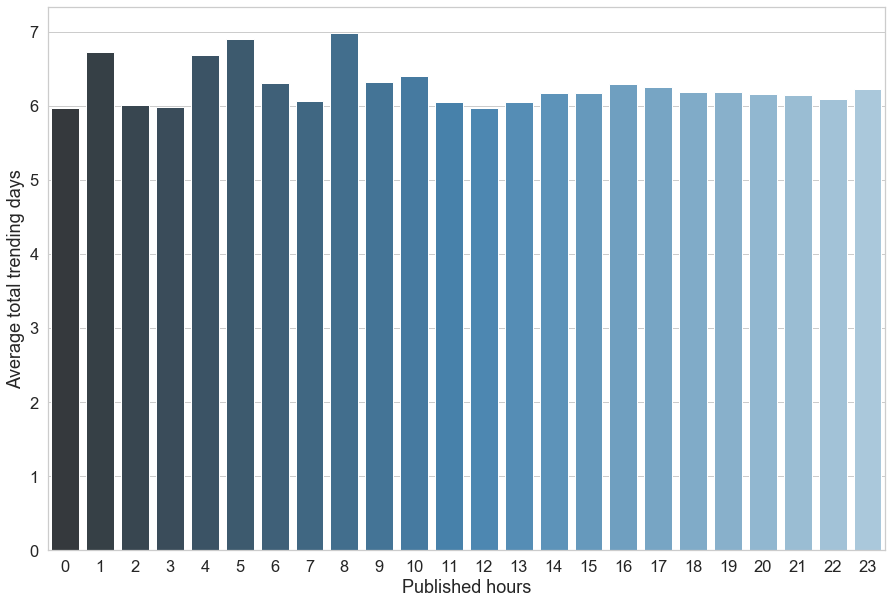

In [53]:
trend_by_hour = df4.groupby('published_hour').mean()['total_trending_days'].sort_values(ascending = True)
trend_by_hour = pd.DataFrame({'published_hour': trend_by_hour.index, 'total_trending_days': trend_by_hour.values})
sns.barplot(x = 'published_hour', y = 'total_trending_days', data = trend_by_hour,palette="Blues_d")
plt.ylabel('Average total trending days')
plt.xlabel('Published hours')
plt.savefig('figs/trend_by_hour.png', dpi = 600, bbox_inches = 'tight')

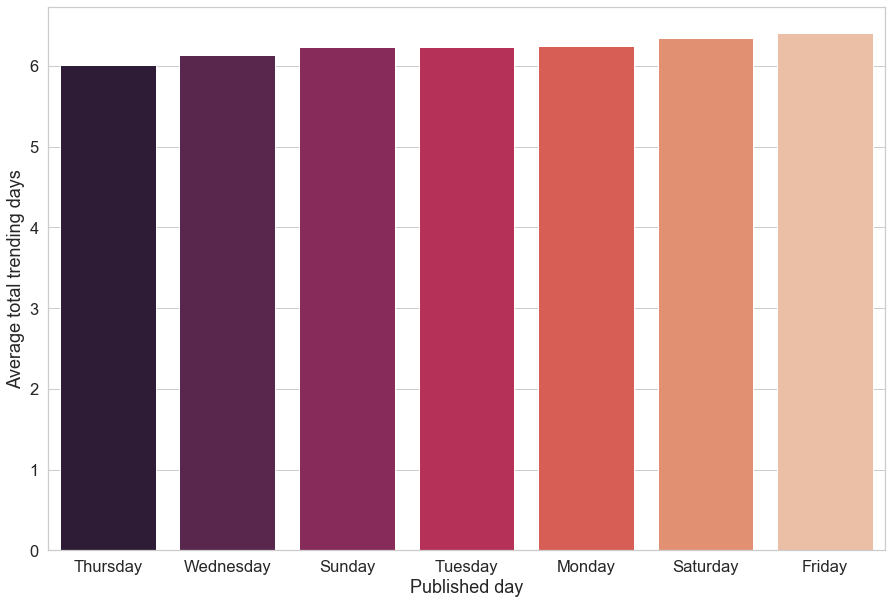

In [54]:
trend_by_hour = df4.groupby('published_weekday_name').mean()['total_trending_days'].sort_values(ascending = True)
trend_by_hour = pd.DataFrame({'published_weekday_name': trend_by_hour.index, 'total_trending_days': trend_by_hour.values})
sns.barplot(x = 'published_weekday_name', y = 'total_trending_days', data = trend_by_hour,palette="rocket")
plt.xlabel('Published day')
plt.ylabel('Average total trending days')
plt.savefig('figs/trend_by_day.png',dpi = 600, bbox_inches = 'tight')

In [32]:
df4

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,publish_weekday,trend_time,num_trending_day,total_trending_days,published_year,published_month,published_hour,published_week,published_weekday,published_weekday_name
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,...,Tuesday,0,1.0,7,2020,8,19,33,1,Tuesday
1,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-13,brawadis|prank|basketball|skits|ghost|funny vi...,3017834,183592,...,Tuesday,1,2.0,7,2020,8,19,33,1,Tuesday
2,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-14,brawadis|prank|basketball|skits|ghost|funny vi...,3721729,195344,...,Tuesday,2,3.0,7,2020,8,19,33,1,Tuesday
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-15,brawadis|prank|basketball|skits|ghost|funny vi...,3853404,200215,...,Tuesday,3,4.0,7,2020,8,19,33,1,Tuesday
4,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-16,brawadis|prank|basketball|skits|ghost|funny vi...,3898795,201808,...,Tuesday,4,5.0,7,2020,8,19,33,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123786,Jws7cXveMjQ,Hiking To The Roughest Ghost Town In Death Valley,2022-04-16 20:00:11,UCEjBDKfrqQI4TgzT9YLNT8g,Ghost Town Living,22,2022-04-18,[None],270127,20834,...,Saturday,1,1.0,1,2022,4,20,15,5,Saturday
123787,RK6yrYFbAKA,NEW! 🐰 How I Got ALL 🥚EASTER EGGS🥚 In Pet Simu...,2022-04-17 16:48:59,UCdRsL0QV96hMlWZOtd5_fOg,ZOMG,20,2022-04-18,pet simulator x|pet simulator x easter egg hun...,284120,8252,...,Sunday,0,1.0,1,2022,4,16,15,6,Sunday
123788,ajm7Lo4PFuU,Minecraft but it's SUPER EASY,2022-04-16 22:30:01,UC1HL3TABt6QGd_P857BH_CA,Evbo,22,2022-04-18,[None],963739,27995,...,Saturday,1,1.0,1,2022,4,22,15,5,Saturday
123789,8EySMR5TdHE,they should add this button to cars,2022-04-16 19:53:12,UCpIafFPGutTAKOBHMtGen7g,Gus Johnson,23,2022-04-18,gus|gus johnson|meme|new meme|ian kung|sven jo...,266795,31411,...,Saturday,1,1.0,1,2022,4,19,15,5,Saturday


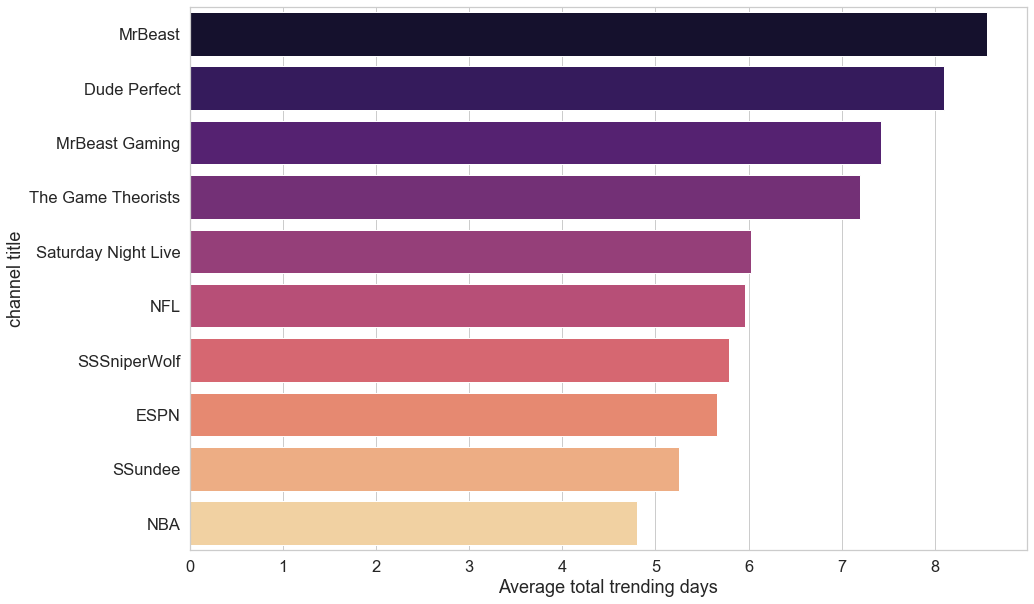

In [55]:
trend_by_chan = df4[df4.channelTitle.isin(top_channel['channel title'])].groupby('channelTitle').mean()['total_trending_days'].sort_values(ascending = False)
trend_by_chan = pd.DataFrame({'channel title': trend_by_chan.index, 'total_trending_days': trend_by_chan.values})
sns.barplot(y = 'channel title', x = 'total_trending_days', data = trend_by_chan,palette = "magma")
plt.xlabel('Average total trending days')
plt.savefig('figs/trend_by_chan.png',dpi = 600, bbox_inches = 'tight')

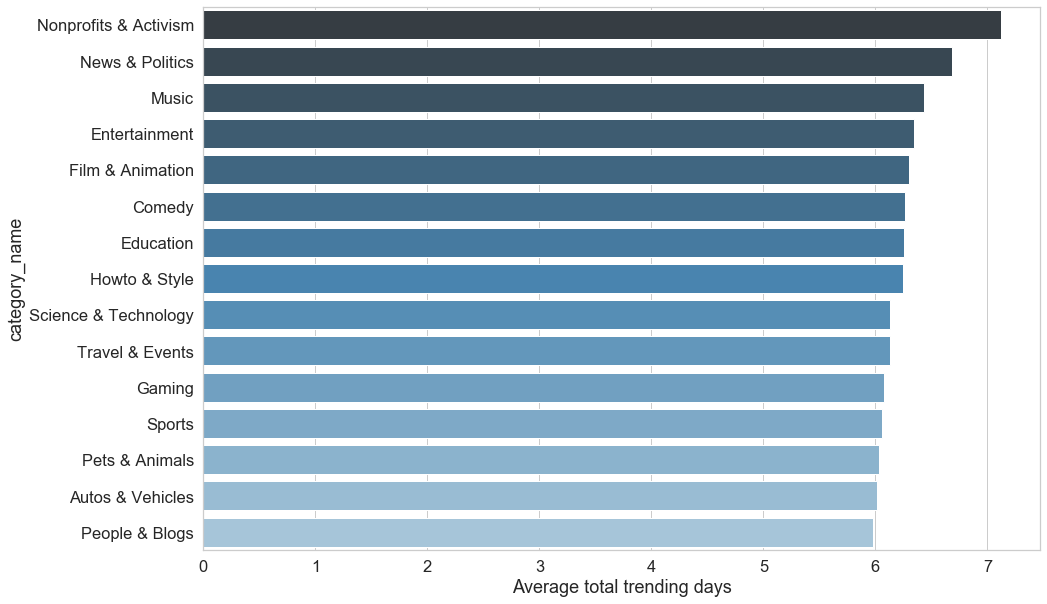

In [56]:
trend_by_cat = df4.groupby('category_name').mean()['total_trending_days'].sort_values(ascending = False)
trend_by_cat = pd.DataFrame({'category_name': trend_by_cat.index, 'total_trending_days': trend_by_cat.values})
sns.barplot(y = 'category_name', x = 'total_trending_days', data = trend_by_cat,palette="Blues_d")
plt.xlabel('Average total trending days')
plt.savefig('figs/trend_by_cat.png',dpi = 600, bbox_inches = 'tight')

In [35]:
df4.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'category_name', 'publish_hour',
       'publish_weekday', 'trend_time', 'num_trending_day',
       'total_trending_days', 'published_year', 'published_month',
       'published_hour', 'published_week', 'published_weekday',
       'published_weekday_name'],
      dtype='object')

In [36]:
X = df4[['category_name', 'trending_date', 'view_count', 'likes',
       'dislikes', 'comment_count', 'published_year', 'published_month',
       'published_hour', 'num_trending_day','published_weekday','published_week']]
Y = df4[['total_trending_days']]

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                            test_size=0.5,random_state=0)

In [38]:
df5 = X_train.copy()
df5['total_trending_days'] = Y['total_trending_days']

In [57]:
model = smf.ols(formula='total_trending_days ~ -1 + view_count + likes + dislikes + comment_count + C(category_name)*view_count + published_month + published_hour + published_weekday + num_trending_day + published_week', data=df5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_trending_days   R-squared:                       0.385
Model:                             OLS   Adj. R-squared:                  0.384
Method:                  Least Squares   F-statistic:                     1046.
Date:                 Fri, 06 May 2022   Prob (F-statistic):               0.00
Time:                         18:29:39   Log-Likelihood:            -1.3046e+05
No. Observations:                61895   AIC:                         2.610e+05
Df Residuals:                    61857   BIC:                         2.613e+05
Df Model:                           37                                         
Covariance Type:             nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
C(category_name)[Autos & Vehicles]                       4.4392      0.076     58.559      0.000       4.291       4.588
C(category_name)[Comedy]                                 4.4510      0.047     94.768      0.000       4.359       4.543
C(category_name)[Education]                              4.6756      0.063     74.796      0.000       4.553       4.798
C(category_name)[Entertainment]                          4.3997      0.034    127.771      0.000       4.332       4.467
C(category_name)[Film & Animation]                       4.6363      0.055     84.375      0.000       4.529       4.744
C(category_name)[Gaming]                                 4.3201      0.036    118.625      0.000       4.249       4.391
C(category_name)[Howto & Style]                          4.6792      0.061     76.176      0.000       4.559       4.800
C(category_name)[Music]                                  4.6678      0.035    133.156      0.000       4.599       4.736
C(category_name)[News & Politics]                        4.5862      0.050     91.525      0.000       4.488       4.684
C(category_name)[Nonprofits & Activism]                  4.1916      0.425      9.852      0.000       3.358       5.025
C(category_name)[People & Blogs]                         4.3394      0.042    104.374      0.000       4.258       4.421
C(category_name)[Pets & Animals]                         4.3447      0.169     25.651      0.000       4.013       4.677
C(category_name)[Science & Technology]                   4.4653      0.058     77.316      0.000       4.352       4.579
C(category_name)[Sports]                                 3.9146      0.038    101.844      0.000       3.839       3.990
C(category_name)[Travel & Events]                        4.5549      0.136     33.432      0.000       4.288       4.822
view_count                                           -3.714e-09   3.28e-08     -0.113      0.910    -6.8e-08    6.05e-08
C(category_name)[T.Comedy]:view_count                 1.188e-07   3.34e-08      3.553      0.000    5.33e-08    1.84e-07
C(category_name)[T.Education]:view_count              1.059e-08   3.41e-08      0.311      0.756   -5.62e-08    7.74e-08
C(category_name)[T.Entertainment]:view_count          1.028e-07   3.28e-08      3.131      0.002    3.84e-08    1.67e-07
C(category_name)[T.Film & Animation]:view_count       3.246e-08   3.42e-08      0.950      0.342   -3.45e-08    9.94e-08
C(category_name)[T.Gaming]:view_count                  9.28e-08   3.34e-08      2.781      0.005    2.74e-08    1.58e-07
C(category_name)[T.Howto & Style]:view_count          4.052e-10   3.87e-08      0.010      0.992   -7.55e-08    7.63e-08
C(category_name)[T.Music]:view_count           

channels could estimate their total number of days their video could trend based on the number of views, likes, dislikes and comments the video is receiving